# Listing 3.1 Visualizing raw input

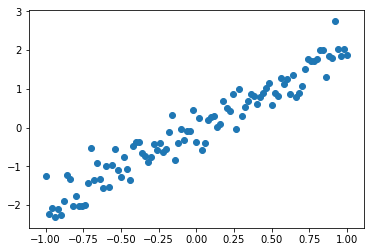

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

# Listing 3.2 Solving linear regression 


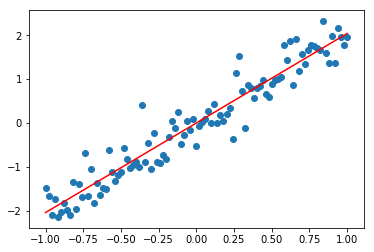

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X, w)
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for(x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y:y})
        
w_val = sess.run(w)

sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()
                                                                     
                                                                


# Listing 3.3 Using a polynomial model


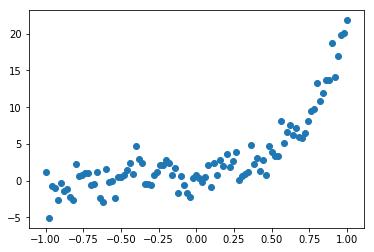

[ 0.89554048  1.43726289  4.03292131  5.46554804  4.55720043  5.11936235]


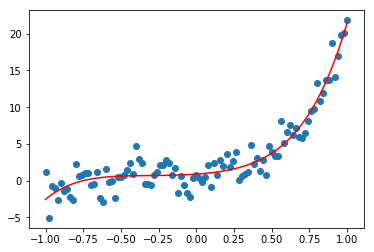

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epoch = 40

trX = np.linspace(-1,1,101)

num_coeffs = 6
trY_coeffs=[1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY+=trY_coeffs[i] * np.power(trX, i)
    
trY +=np.random.randn(*trX.shape) * 1.5

plt.scatter(trX, trY)
plt.show()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
    terms=[]
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.]* num_coeffs, name='parameters')
y_model = model(X,w)

cost = (tf.pow(Y-y_model,2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for(x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y:y})
        
w_val = sess.run(w)
print(w_val)
sess.close()

plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2+=w_val[i]*np.power(trX,i)
plt.plot(trX, trY2, 'r')
plt.show()



In [4]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    print(x_dataset.size * ratio)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

# Listing 3.5 Evaluating regularization parameters


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs=1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params=[0.]*num_coeffs
y_dataset_params[2]=1
y_dataset =0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i]*np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape)*0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

def model(X, w):
    terms=[]
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X,w)
cost=tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                       tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
                2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X:x_train, Y: y_train})
    final_cost=sess.run(cost,feed_dict={X: x_test, Y:y_test})
    print("reg lambda", reg_lambda)
    print("final Cost:", final_cost)
sess.close()

70.0
reg lambda 0.0
final Cost: 0.0382416
reg lambda 0.010101010101
final Cost: 0.0344735
reg lambda 0.020202020202
final Cost: 0.0328803
reg lambda 0.030303030303
final Cost: 0.0316161
reg lambda 0.040404040404
final Cost: 0.0306163
reg lambda 0.0505050505051
final Cost: 0.0298463
reg lambda 0.0606060606061
final Cost: 0.029257
reg lambda 0.0707070707071
final Cost: 0.0288043
reg lambda 0.0808080808081
final Cost: 0.0284536
reg lambda 0.0909090909091
final Cost: 0.0281792
reg lambda 0.10101010101
final Cost: 0.0279622
reg lambda 0.111111111111
final Cost: 0.0277887
reg lambda 0.121212121212
final Cost: 0.0276485
reg lambda 0.131313131313
final Cost: 0.027534
reg lambda 0.141414141414
final Cost: 0.0274395
reg lambda 0.151515151515
final Cost: 0.0273607
reg lambda 0.161616161616
final Cost: 0.0272943
reg lambda 0.171717171717
final Cost: 0.0272378
reg lambda 0.181818181818
final Cost: 0.0271893
reg lambda 0.191919191919
final Cost: 0.0271473
reg lambda 0.20202020202
final Cost: 0.02711

# Listing 3.6 Parsing raw CSV datasets


In [6]:
import csv
import time


def read(filename, date_idx, date_parse, year, bucket=7):

    days_in_year = 365

    # Create initial frequency map
    freq = {}
    for period in range(0, int(days_in_year/bucket)):
        freq[period] = 0

    # Read data and aggregate crimes per day
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader:
            if row[date_idx] == '':
                continue
            t = time.strptime(row[date_idx], date_parse)
            if t.tm_year == year and t.tm_yday < (days_in_year-1):
                freq[int(t.tm_yday / bucket)] += 1

    return freq


freq = read('311.csv', 0, '%m/%d/%Y', 2014)
print (freq)

{0: 10278, 1: 16752, 2: 15023, 3: 16961, 4: 16568, 5: 16276, 6: 14739, 7: 17424, 8: 17247, 9: 16508, 10: 17192, 11: 17296, 12: 17073, 13: 18252, 14: 17658, 15: 16604, 16: 17604, 17: 18274, 18: 17708, 19: 19276, 20: 15542, 21: 19434, 22: 17733, 23: 17580, 24: 18232, 25: 18809, 26: 15896, 27: 18436, 28: 19021, 29: 19186, 30: 18396, 31: 17901, 32: 19212, 33: 18941, 34: 16145, 35: 19536, 36: 18135, 37: 17970, 38: 17595, 39: 18952, 40: 17257, 41: 18368, 42: 18252, 43: 18246, 44: 18069, 45: 17623, 46: 18332, 47: 12117, 48: 17130, 49: 18217, 50: 17510, 51: 11972}
